In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\jean-\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (0.13.2)




[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: C:\Users\jean-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [95]:
pip install statsmodels

  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 682.7 kB/s eta 0:00:15
   ---------------------------------------- 0.0/9.6 MB 445.2 kB/s eta 0:00:22
   ---------------------------------------- 0.0/9.6 MB 281.8 kB/s eta 0:00:35
   ---------------------------------------- 0.1/9.6 MB 328.2 kB/s eta 0:00:30
   ---------------------------------------- 0.1/9.6 MB 403.5 kB/s eta 0:00:24
    --------------------------------------- 0.1/9.6 MB 450.6 kB/s eta 0:00:22
    --------------------------------------- 0.1/9.6 MB 450.6 kB/s eta 0:00:22
    --------------------------------------- 0.1/9.6 MB 450.6 kB/s eta 0:00:22
    --------------------------------------- 0.2/9.6 MB 403.5 kB/s eta 0:00:24
    --------------------------------------- 0.2/9.6 MB 492.1 kB/s eta 0:00:20
   - -------------------------------------- 0.3/9.6 MB 507.8 kB/s eta 0:00:19
   - --


[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: C:\Users\jean-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [96]:
import os
import numpy as np
import pandas as pd
import sklearn as skl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [83]:
datapath = os.path.join('data', 'US', 'us_data.csv')
dus = pd.read_csv(datapath, index_col=0)

In [84]:
dus

RPI    INDPRO    UNRATE  UEMP5TO14    PAYEMS    USGOOD  \
2003-04-01  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-02  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-03  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-04  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-07  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
...              ...       ...       ...        ...       ...       ...   
2024-12-24  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-26  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-27  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-30  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-31  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   

              USCONS    MANEMP   DMANEMP  NDMANEMP  ...  DCOILWTICO  FEDFUNDS  \
2003-04-01  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.054781  0.007968   
2003-04-02  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.032055  0.007968   
2003-04-03  0.005246 -0.007706 -0.008612 -0.006242  ...    0.017362  0.007968   
2003-04-04  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.022277  0.007968   
2003-04-07  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.023145  0.007968   
...              ...       ...       ...       ...  ...         ...       ...   
2024-12-24  0.001811 -0.000783 -0.001895  0.001031  ...    0.019520 -0.035091   
2024-12-26  0.001811 -0.000783 -0.001895  0.001031  ...    0.019520 -0.035091   
2024-12-27  0.001811 -0.000783 -0.001895  0.001031  ...    0.012707 -0.035091   
2024-12-30  0.001811 -0.000783 -0.001895  0.001031  ...    0.006293 -0.035091   
2024-12-31  0.001811 -0.000783 -0.001895  0.001031  ...    0.009850 -0.035091   

             CURRCIR  BOGMBASE   WSHOSHO   WSHOTSL  T5YIE  T10YIE  \
2003-04-01  0.005315  0.006078  0.000906  0.000906  -0.01    0.02   
2003-04-02  0.005315  0.006078  0.000906  0.000906   0.02    0.01   
2003-04-03  0.005315  0.006078  0.000906  0.000906  -0.02   -0.02   
2003-04-04  0.005315  0.006078  0.000906  0.000906  -0.01   -0.01   
2003-04-07  0.005315  0.006078  0.000906  0.000906  -0.02    0.02   
...              ...       ...       ...       ...    ...     ...   
2024-12-24  0.001086 -0.002210 -0.001087 -0.001610   0.01    0.03   
2024-12-26  0.001086 -0.002210 -0.000479  0.000039   0.01    0.03   
2024-12-27  0.001086 -0.002210 -0.000479  0.000039  -0.01   -0.01   
2024-12-30  0.001086 -0.002210 -0.000479  0.000039  -0.03   -0.03   
2024-12-31  0.001086 -0.002210 -0.000479  0.000039   0.03    0.03   

            log return gold  log return sp500  
2003-04-01        -0.007018          0.012071  
2003-04-02        -0.015396          0.025781  
2003-04-03        -0.014099         -0.005064  
2003-04-04         0.000983          0.002735  
2003-04-07        -0.008324          0.001228  
...                     ...               ...  
2024-12-24         0.000103          0.010982  
2024-12-26         0.008091         -0.000406  
2024-12-27        -0.005493         -0.011117  
2024-12-30        -0.005592         -0.010760  
2024-12-31         0.007045         -0.004294  

[5477 rows x 78 columns]

In [75]:
cols_inf = dus.columns[np.isinf(dus.to_numpy()).any(axis=0)]
print(cols_inf)

Index([], dtype='object')


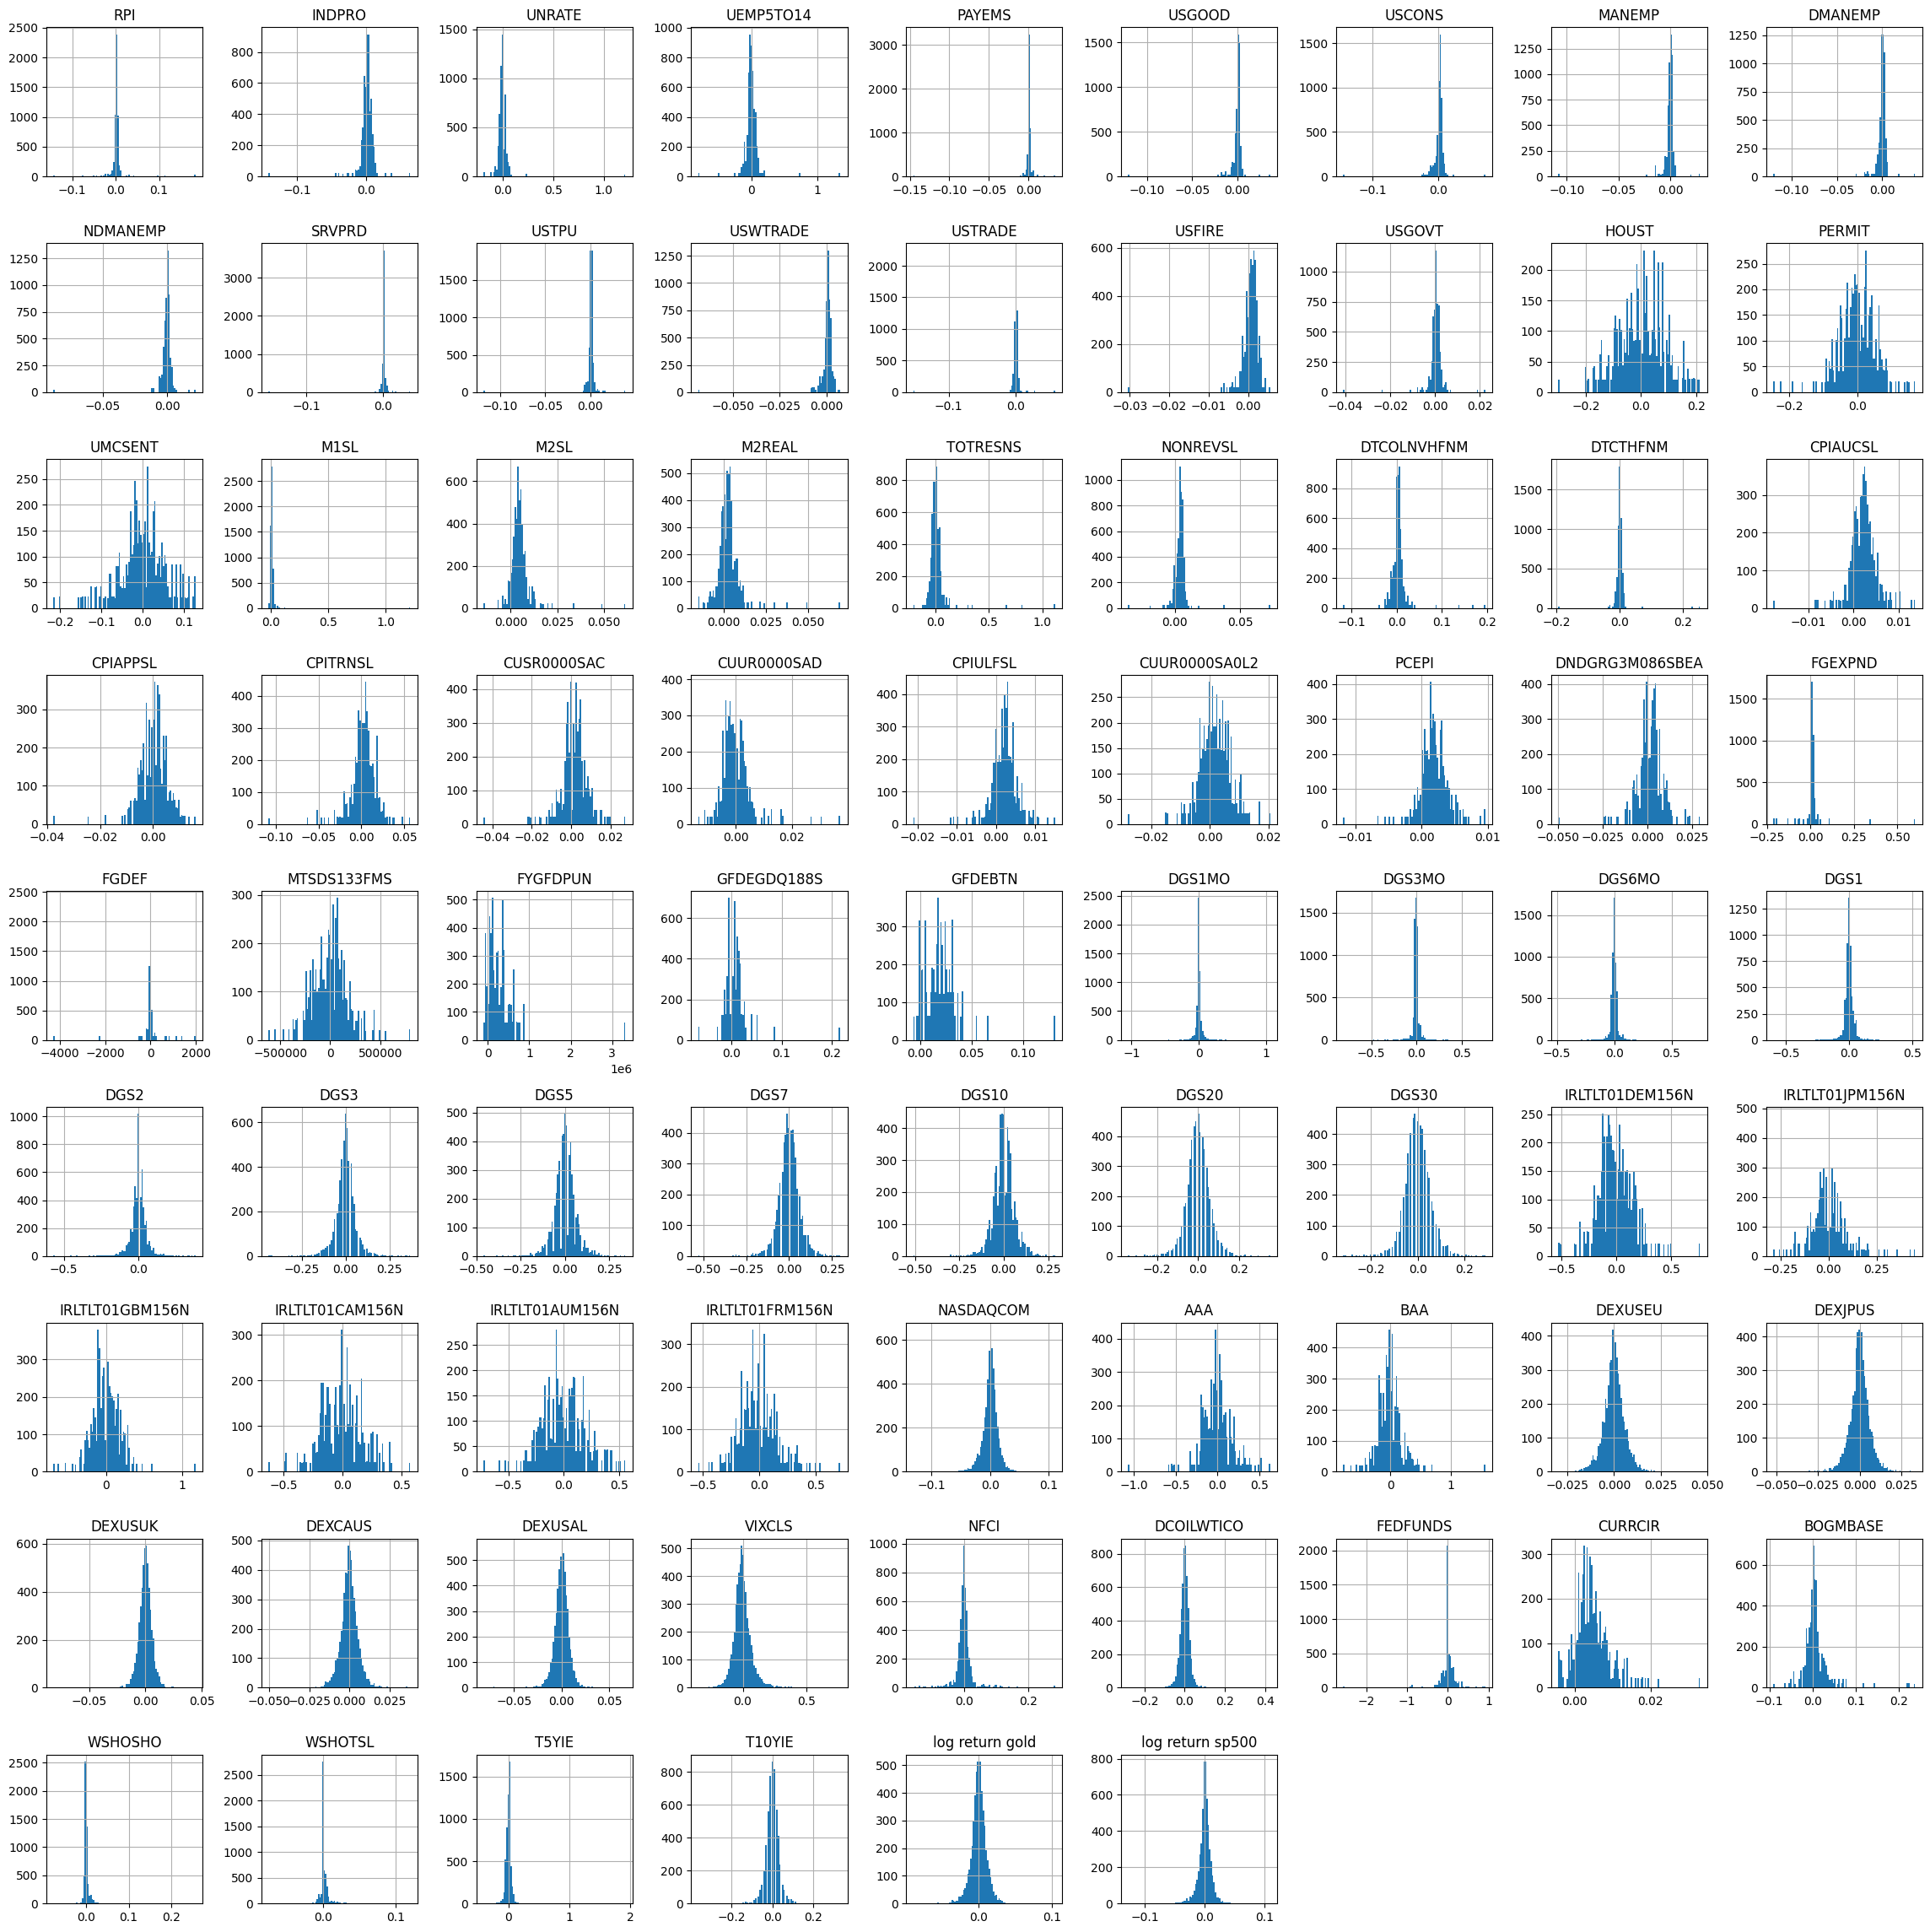

In [33]:
dus.hist(figsize=(23, 23), bins=100)
plt.tight_layout()

In [76]:
labels = pd.to_datetime(dus.index).strftime('%Y-%m')

In [77]:
labels.unique()

Index(['2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01',
       ...
       '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
       '2024-09', '2024-10', '2024-11', '2024-12'],
      dtype='object', length=261)

Let's check again that data looks stationary:

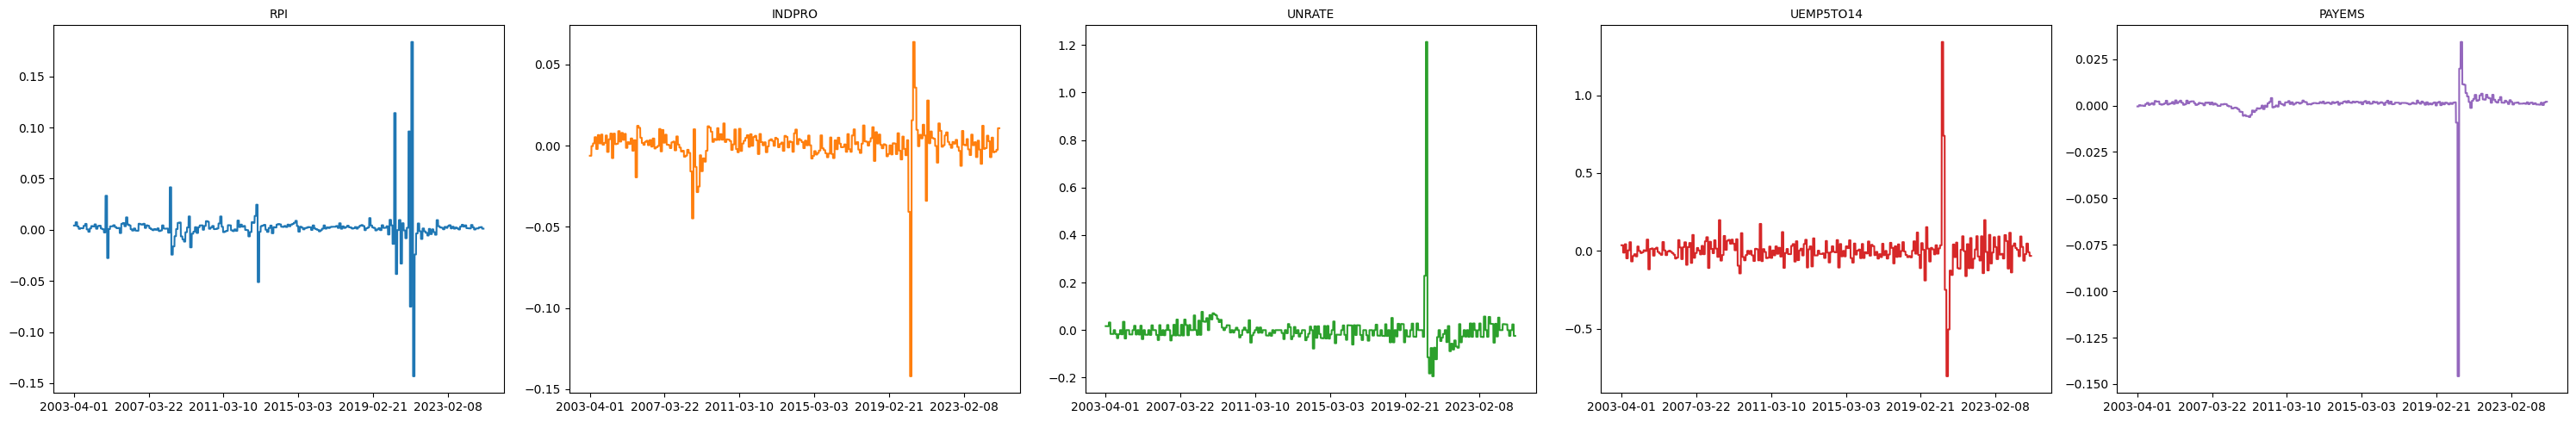

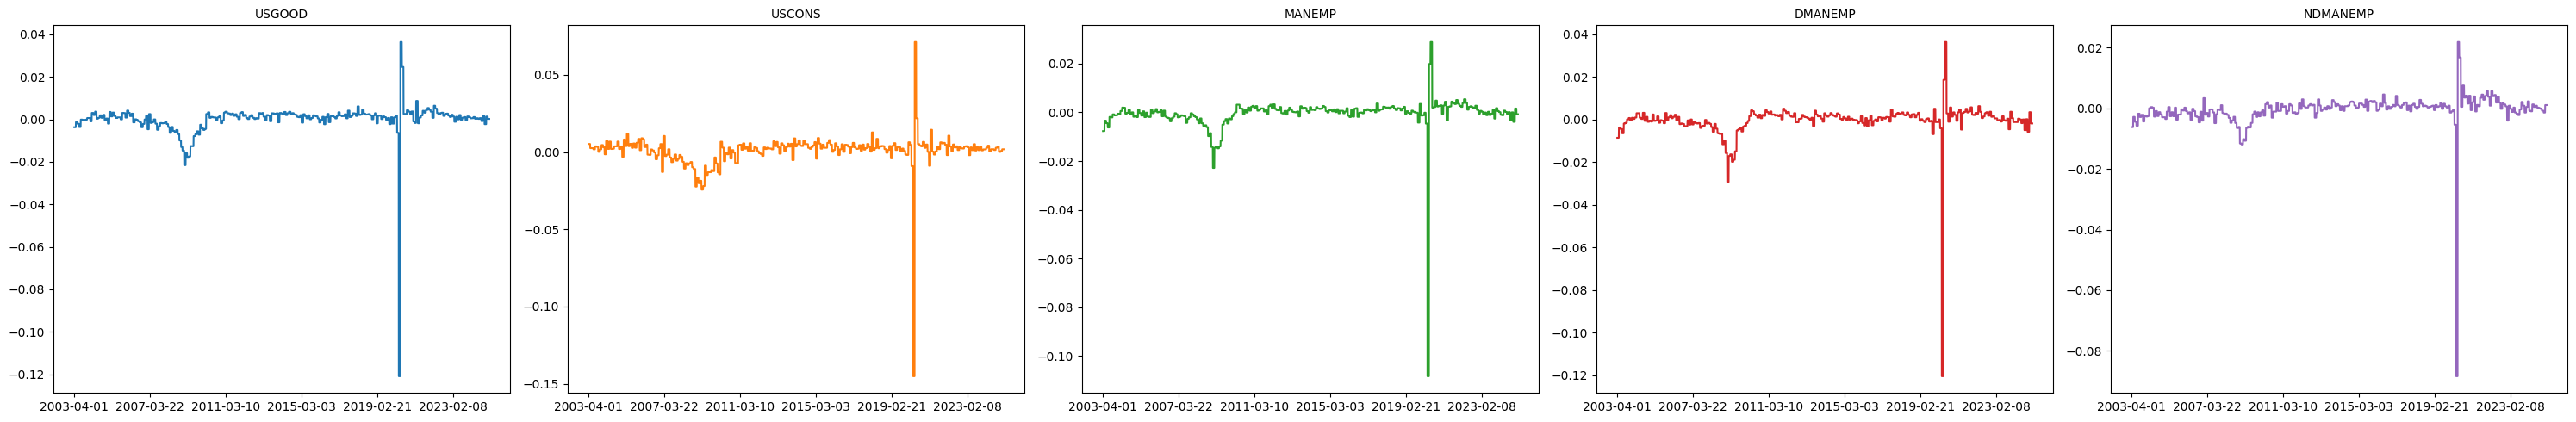

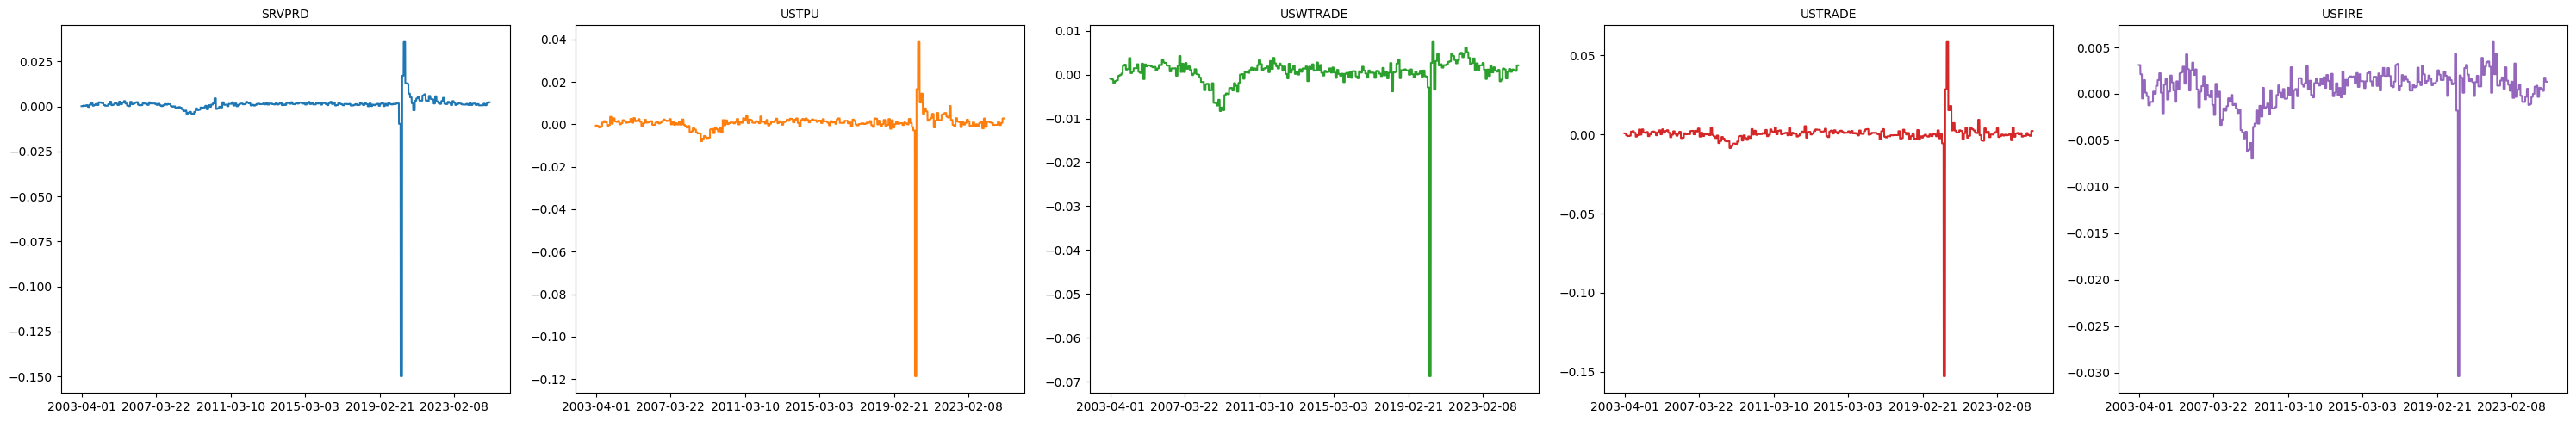

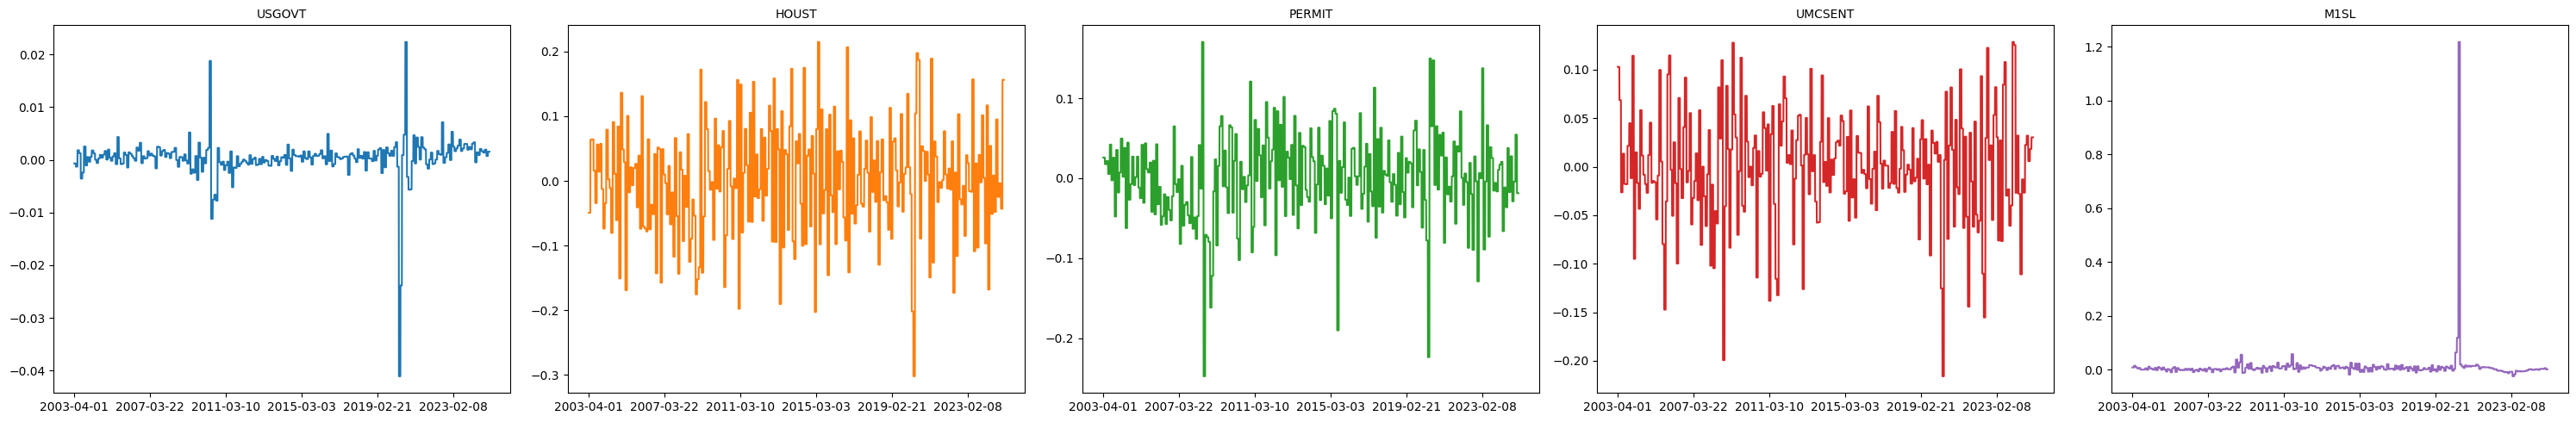

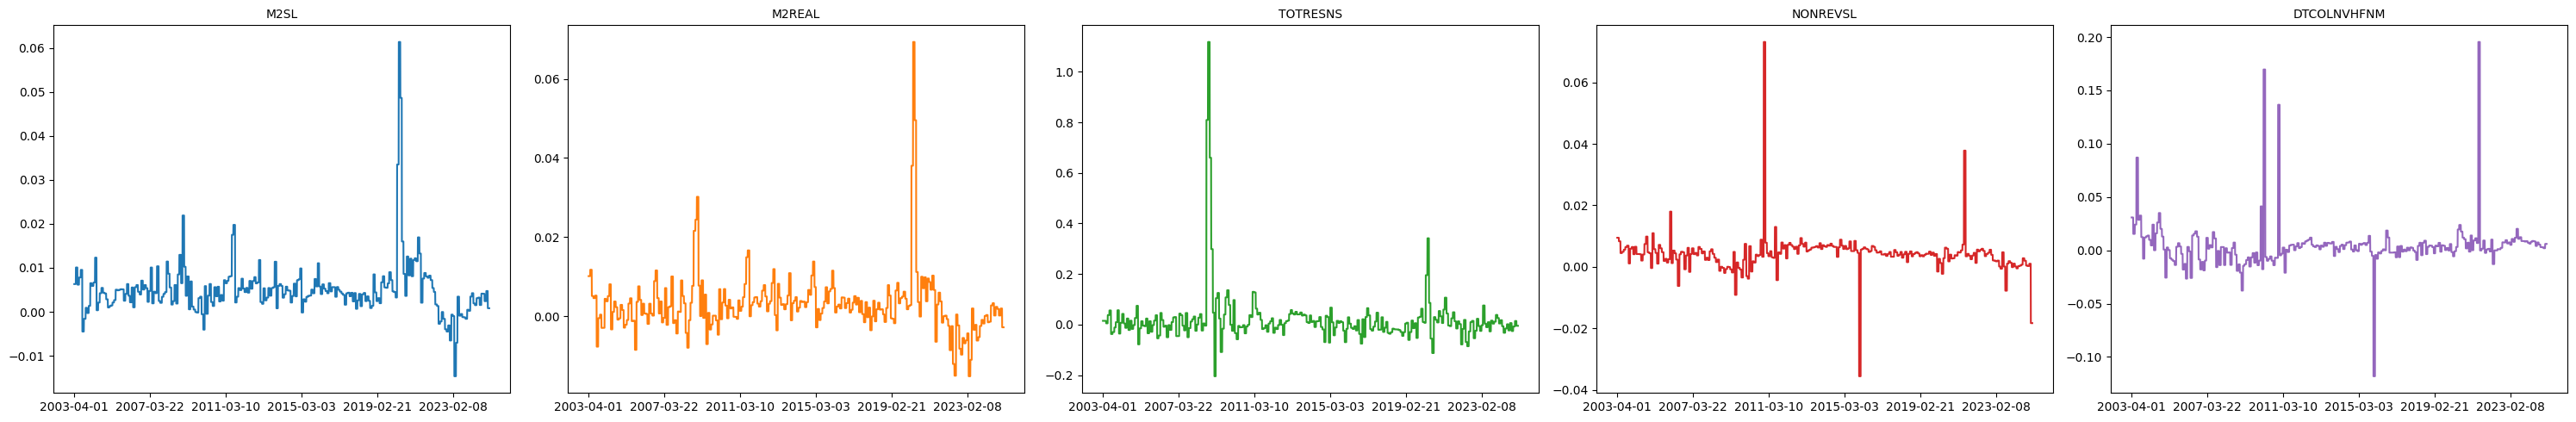

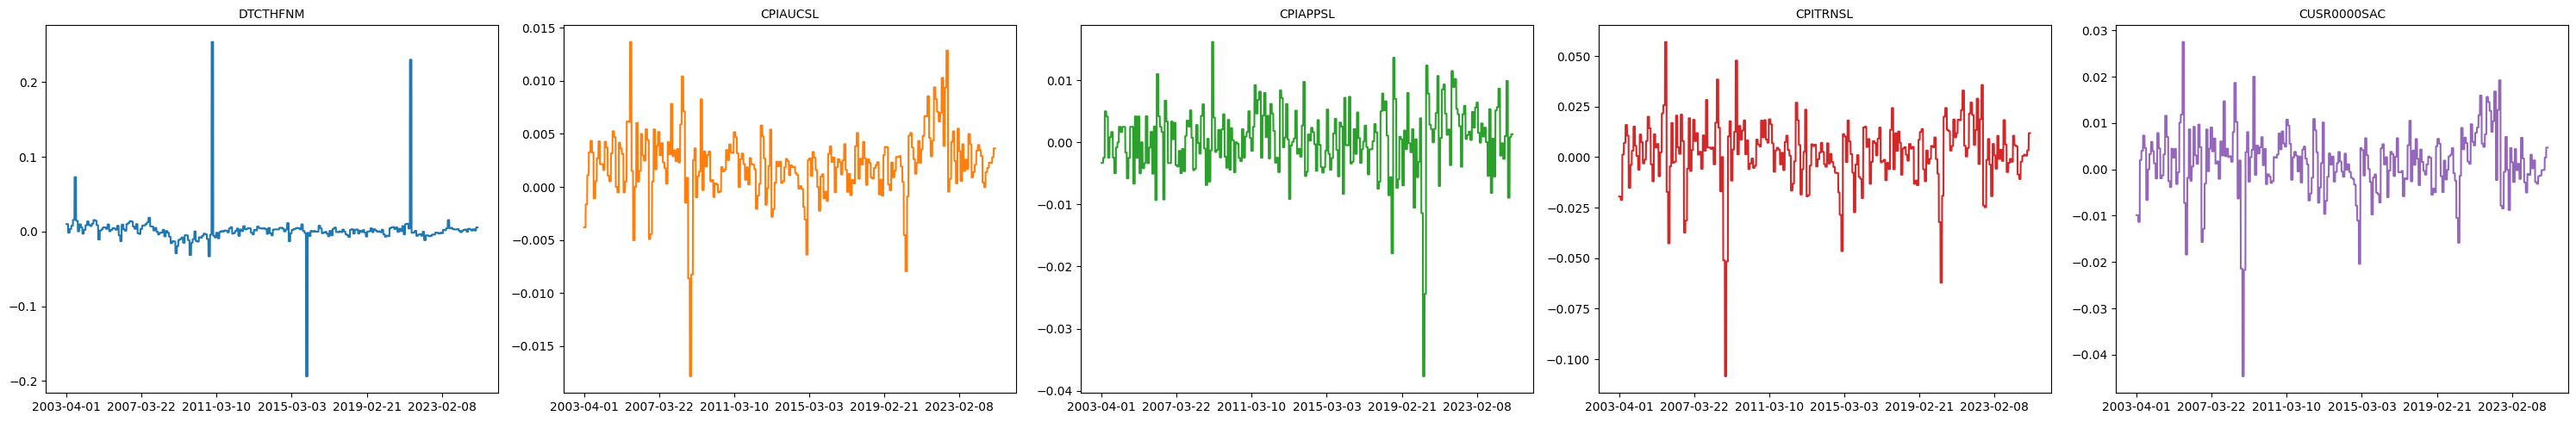

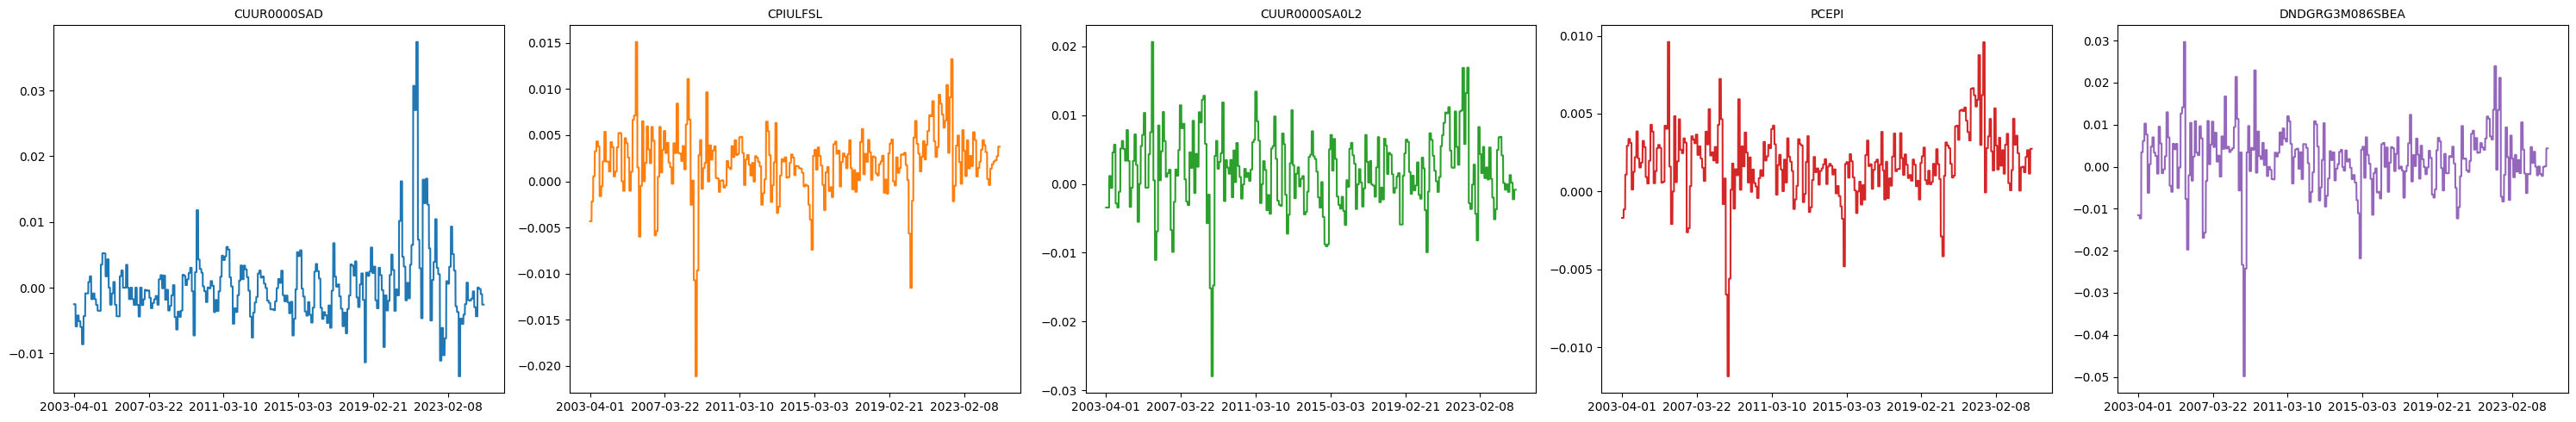

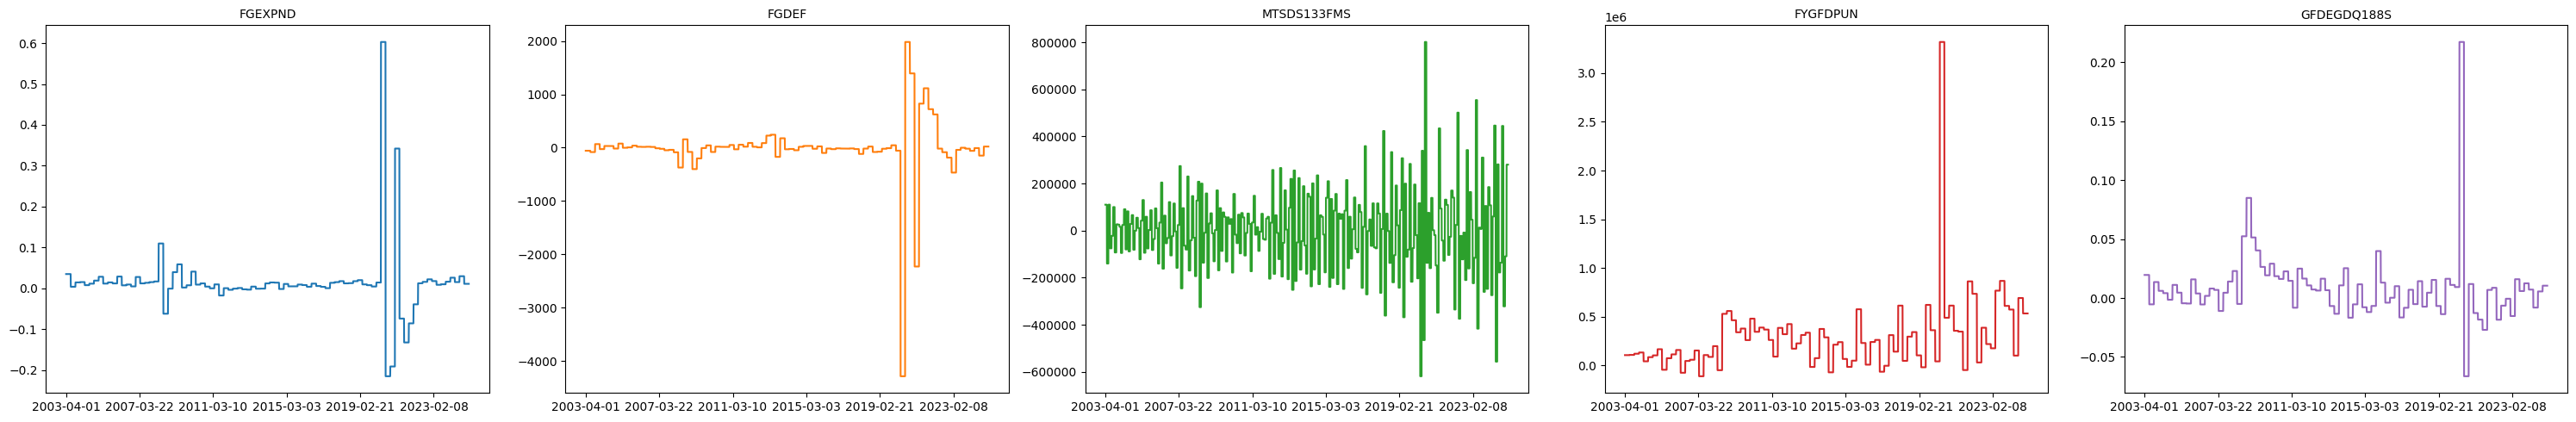

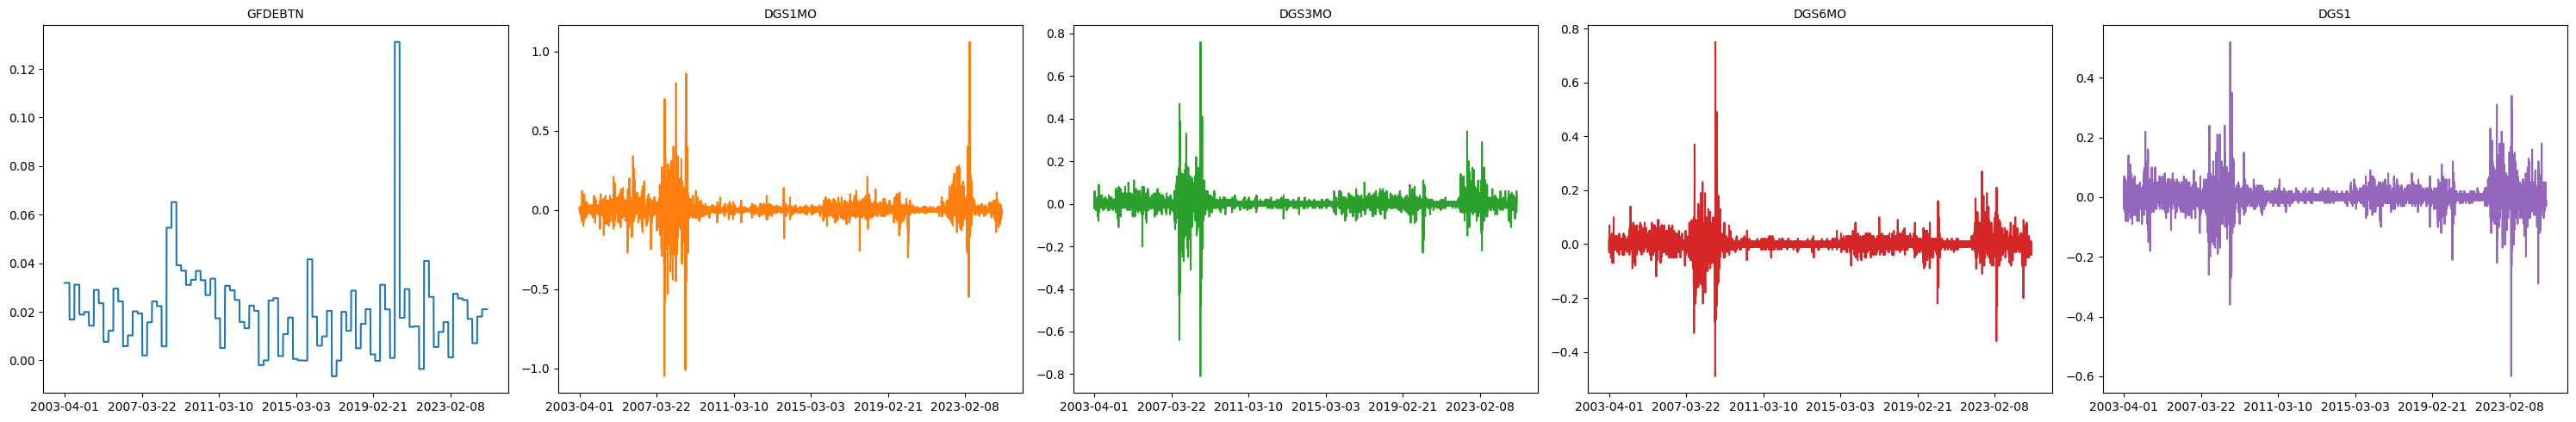

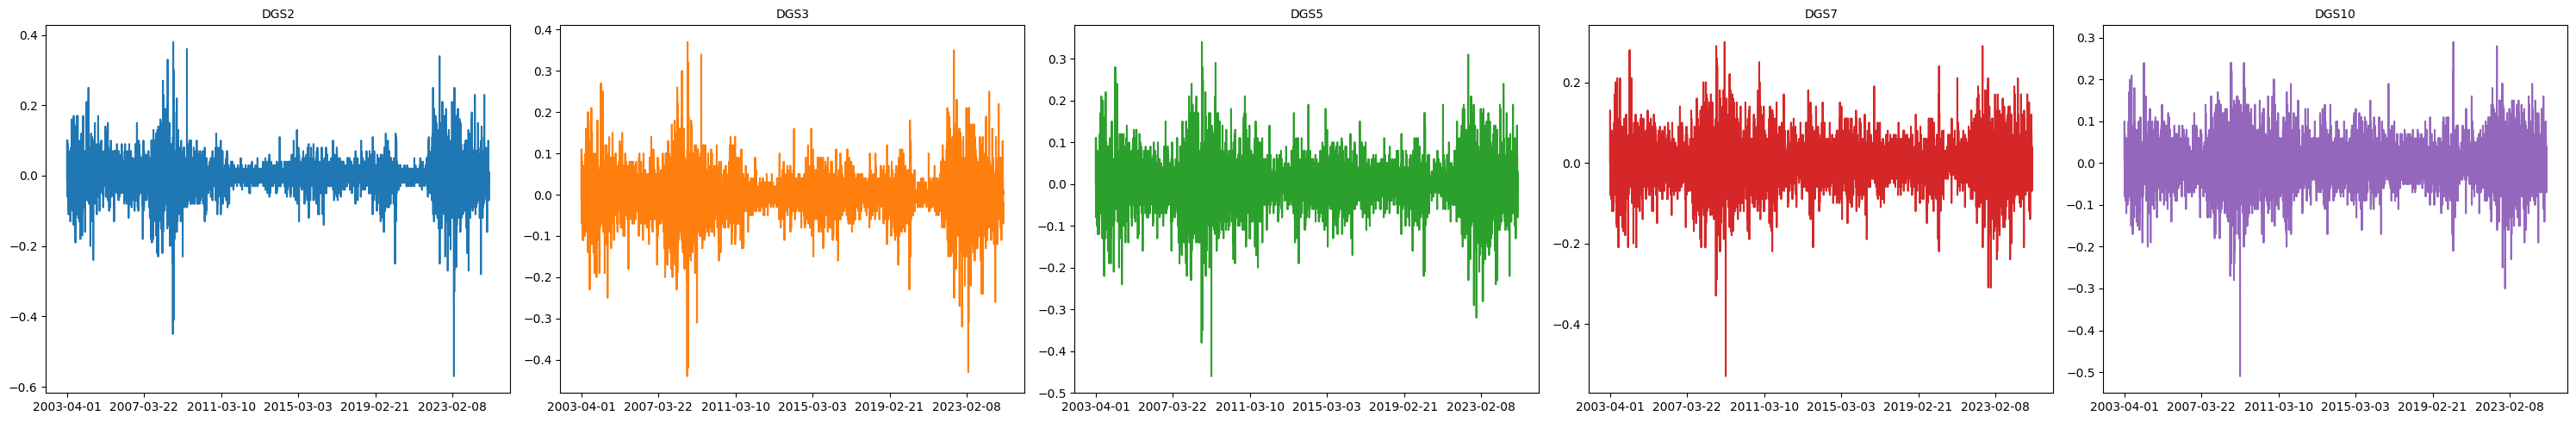

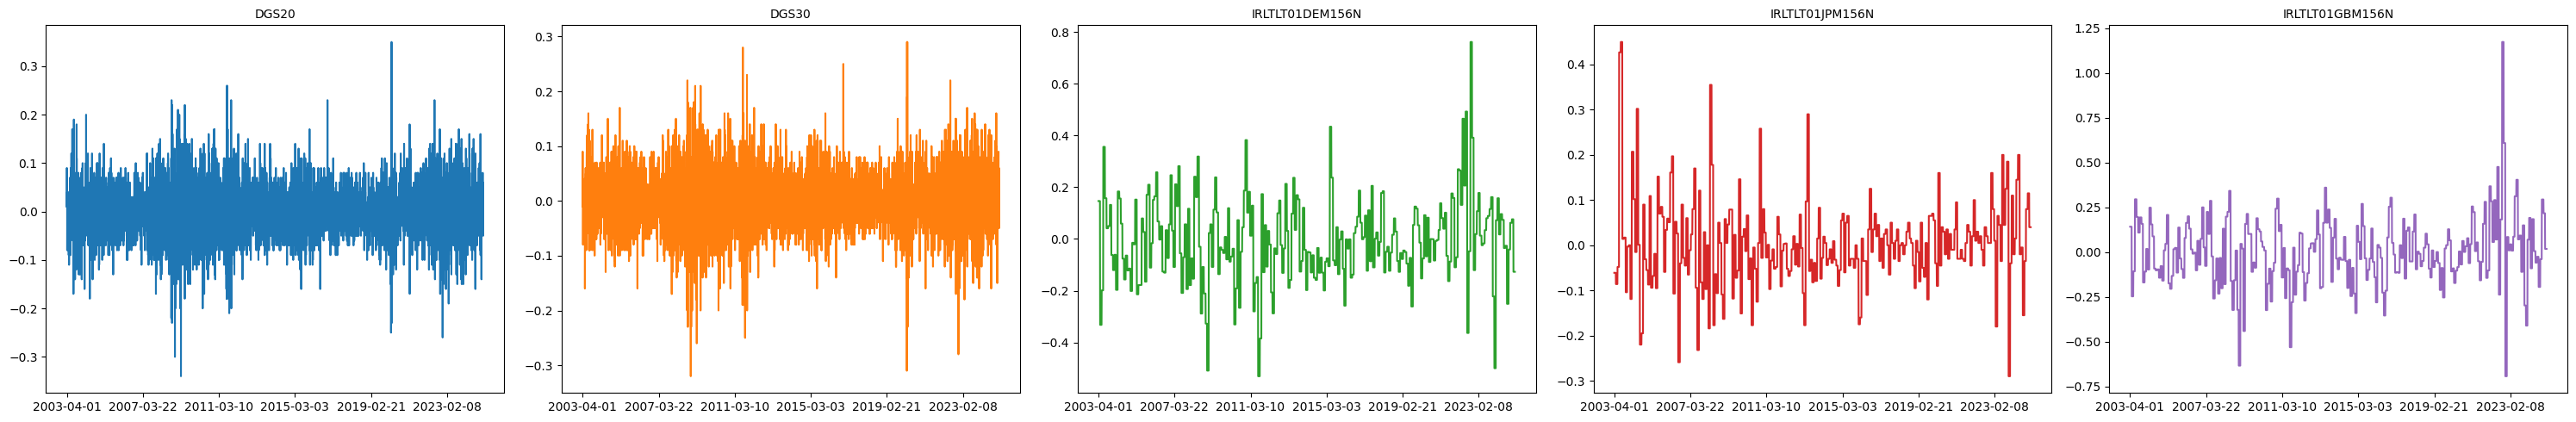

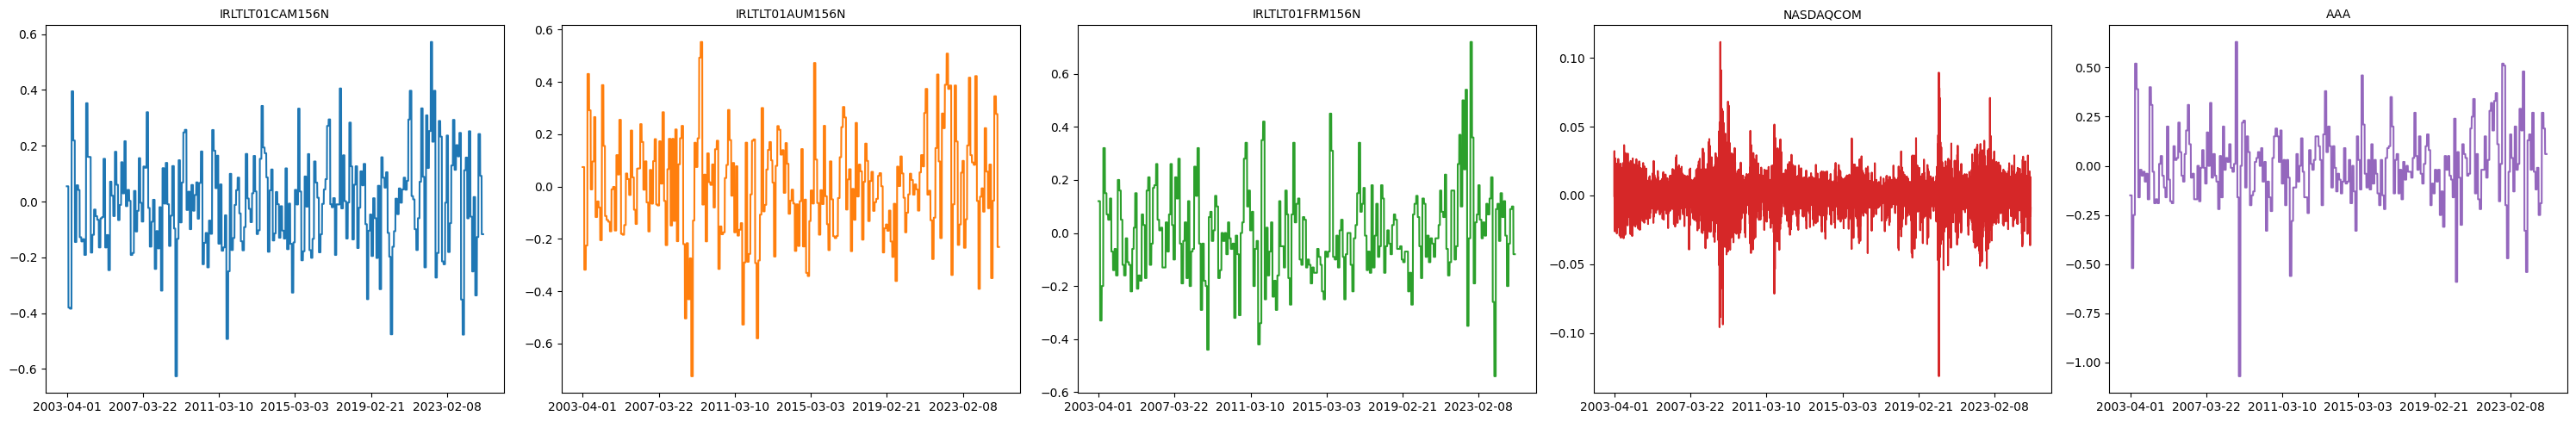

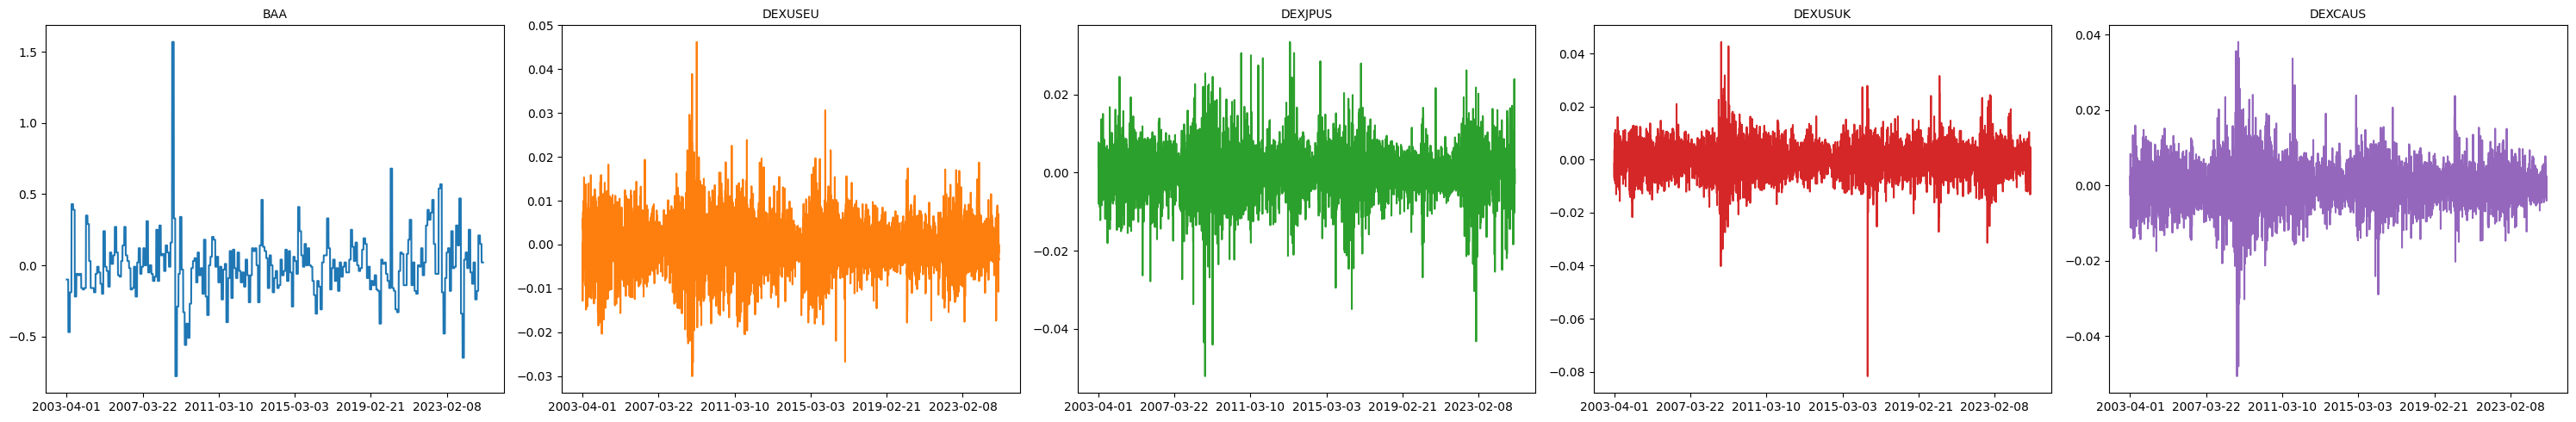

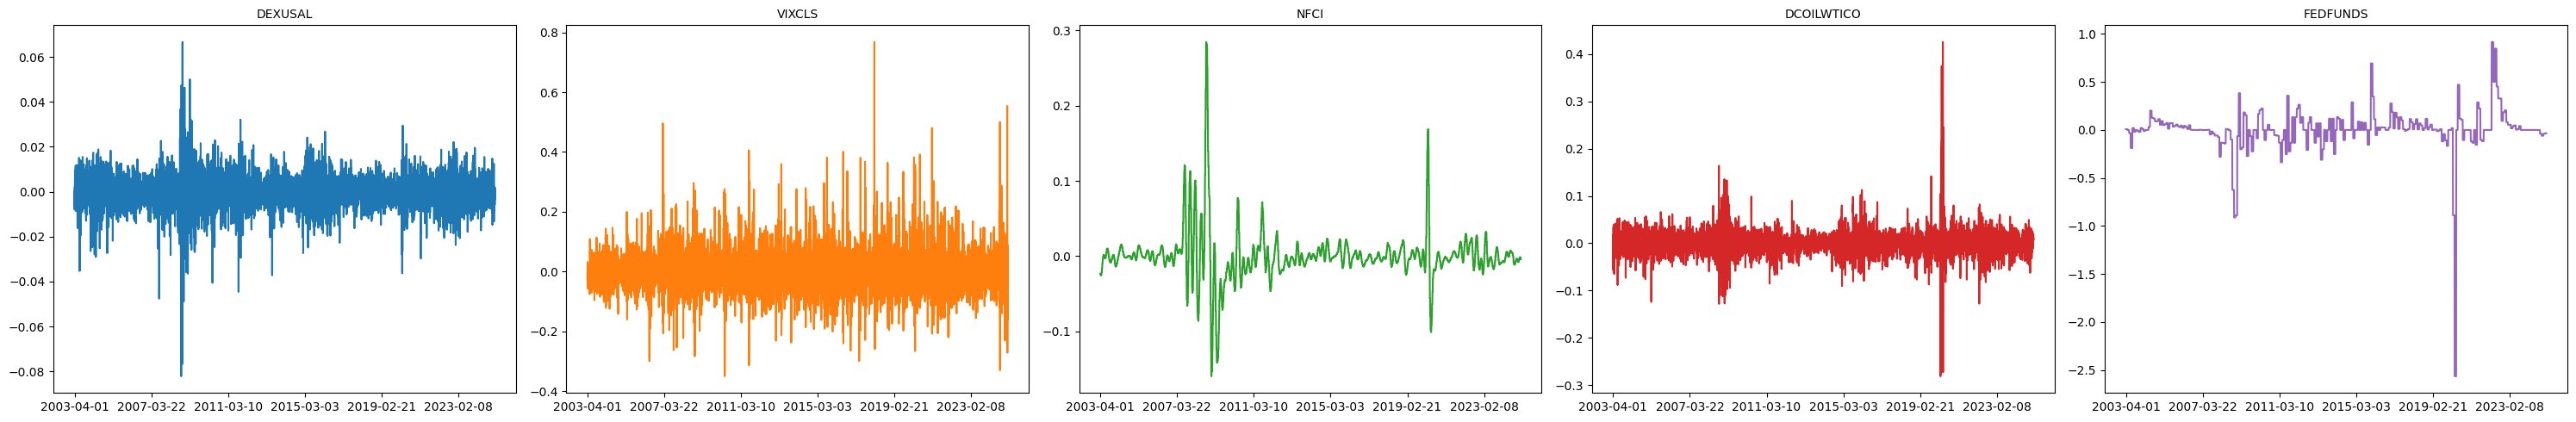

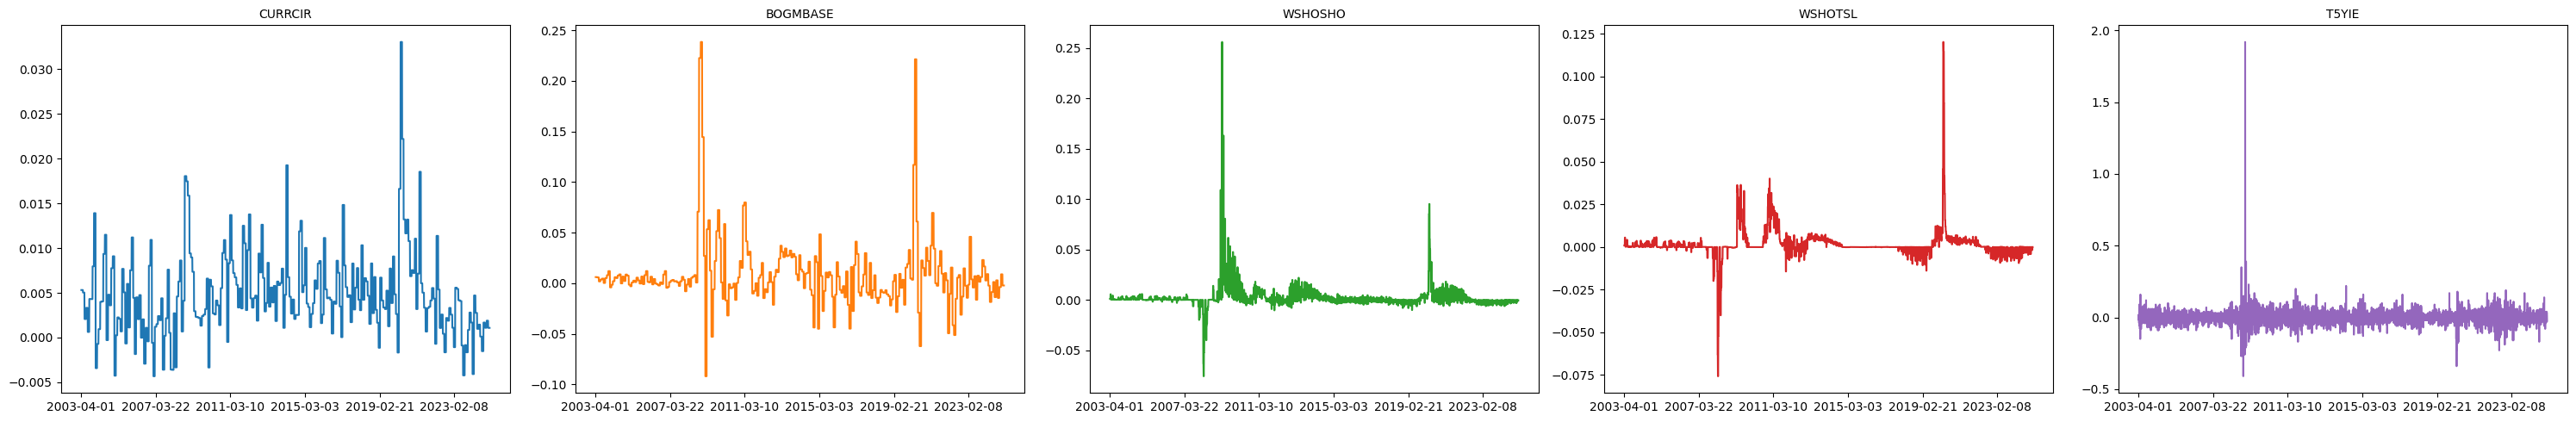

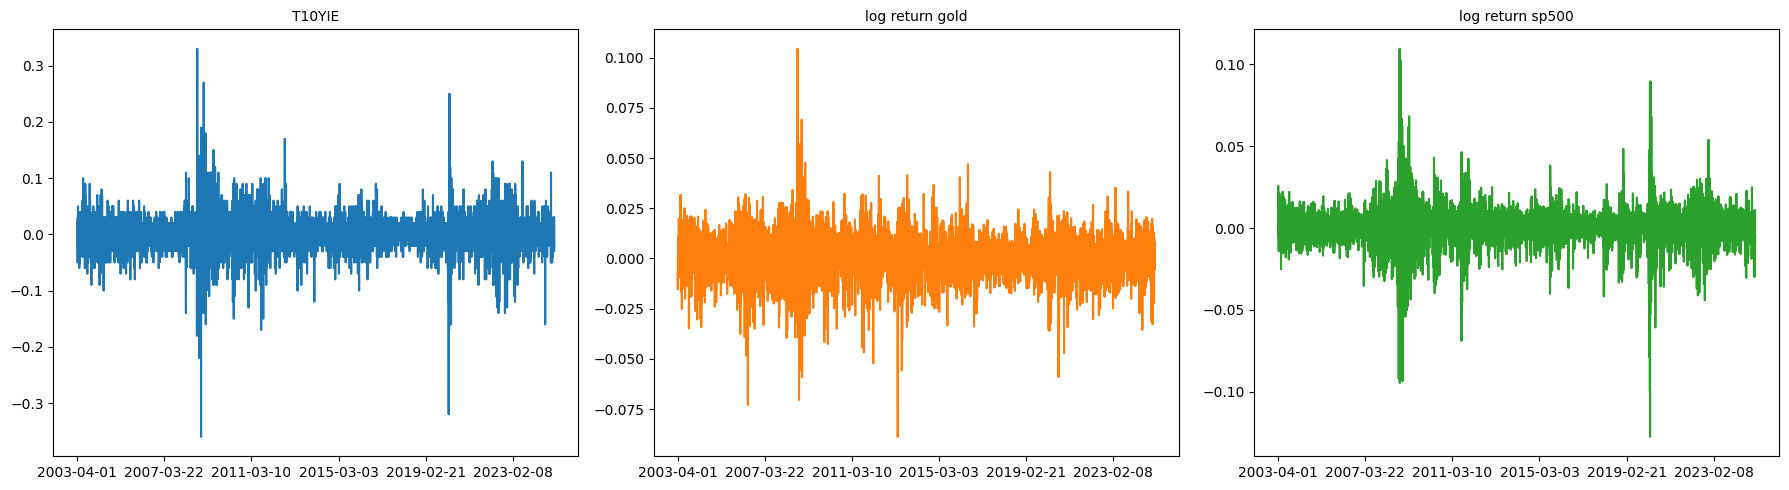

In [37]:
 
n_figs = int(dus.shape[1]/5) +1

for i in range(n_figs):
    subset = dus.iloc[:, i*5 : (i+1)*5]
    axes = subset.plot(subplots=True, layout=(1,5), figsize=(30,5), legend=False)

    # si pandas renvoie une liste (cas 1D), convertir en tableau
    axes = np.array(axes).flatten()
    
    for ax, col in zip(axes, subset.columns):
        ax.set_title(col, fontsize=10)
    
    # masquer cases vides si < 9 séries dans la figure
    for ax in axes[len(subset.columns):]:
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()


We can check correlation within features:

<Axes: >

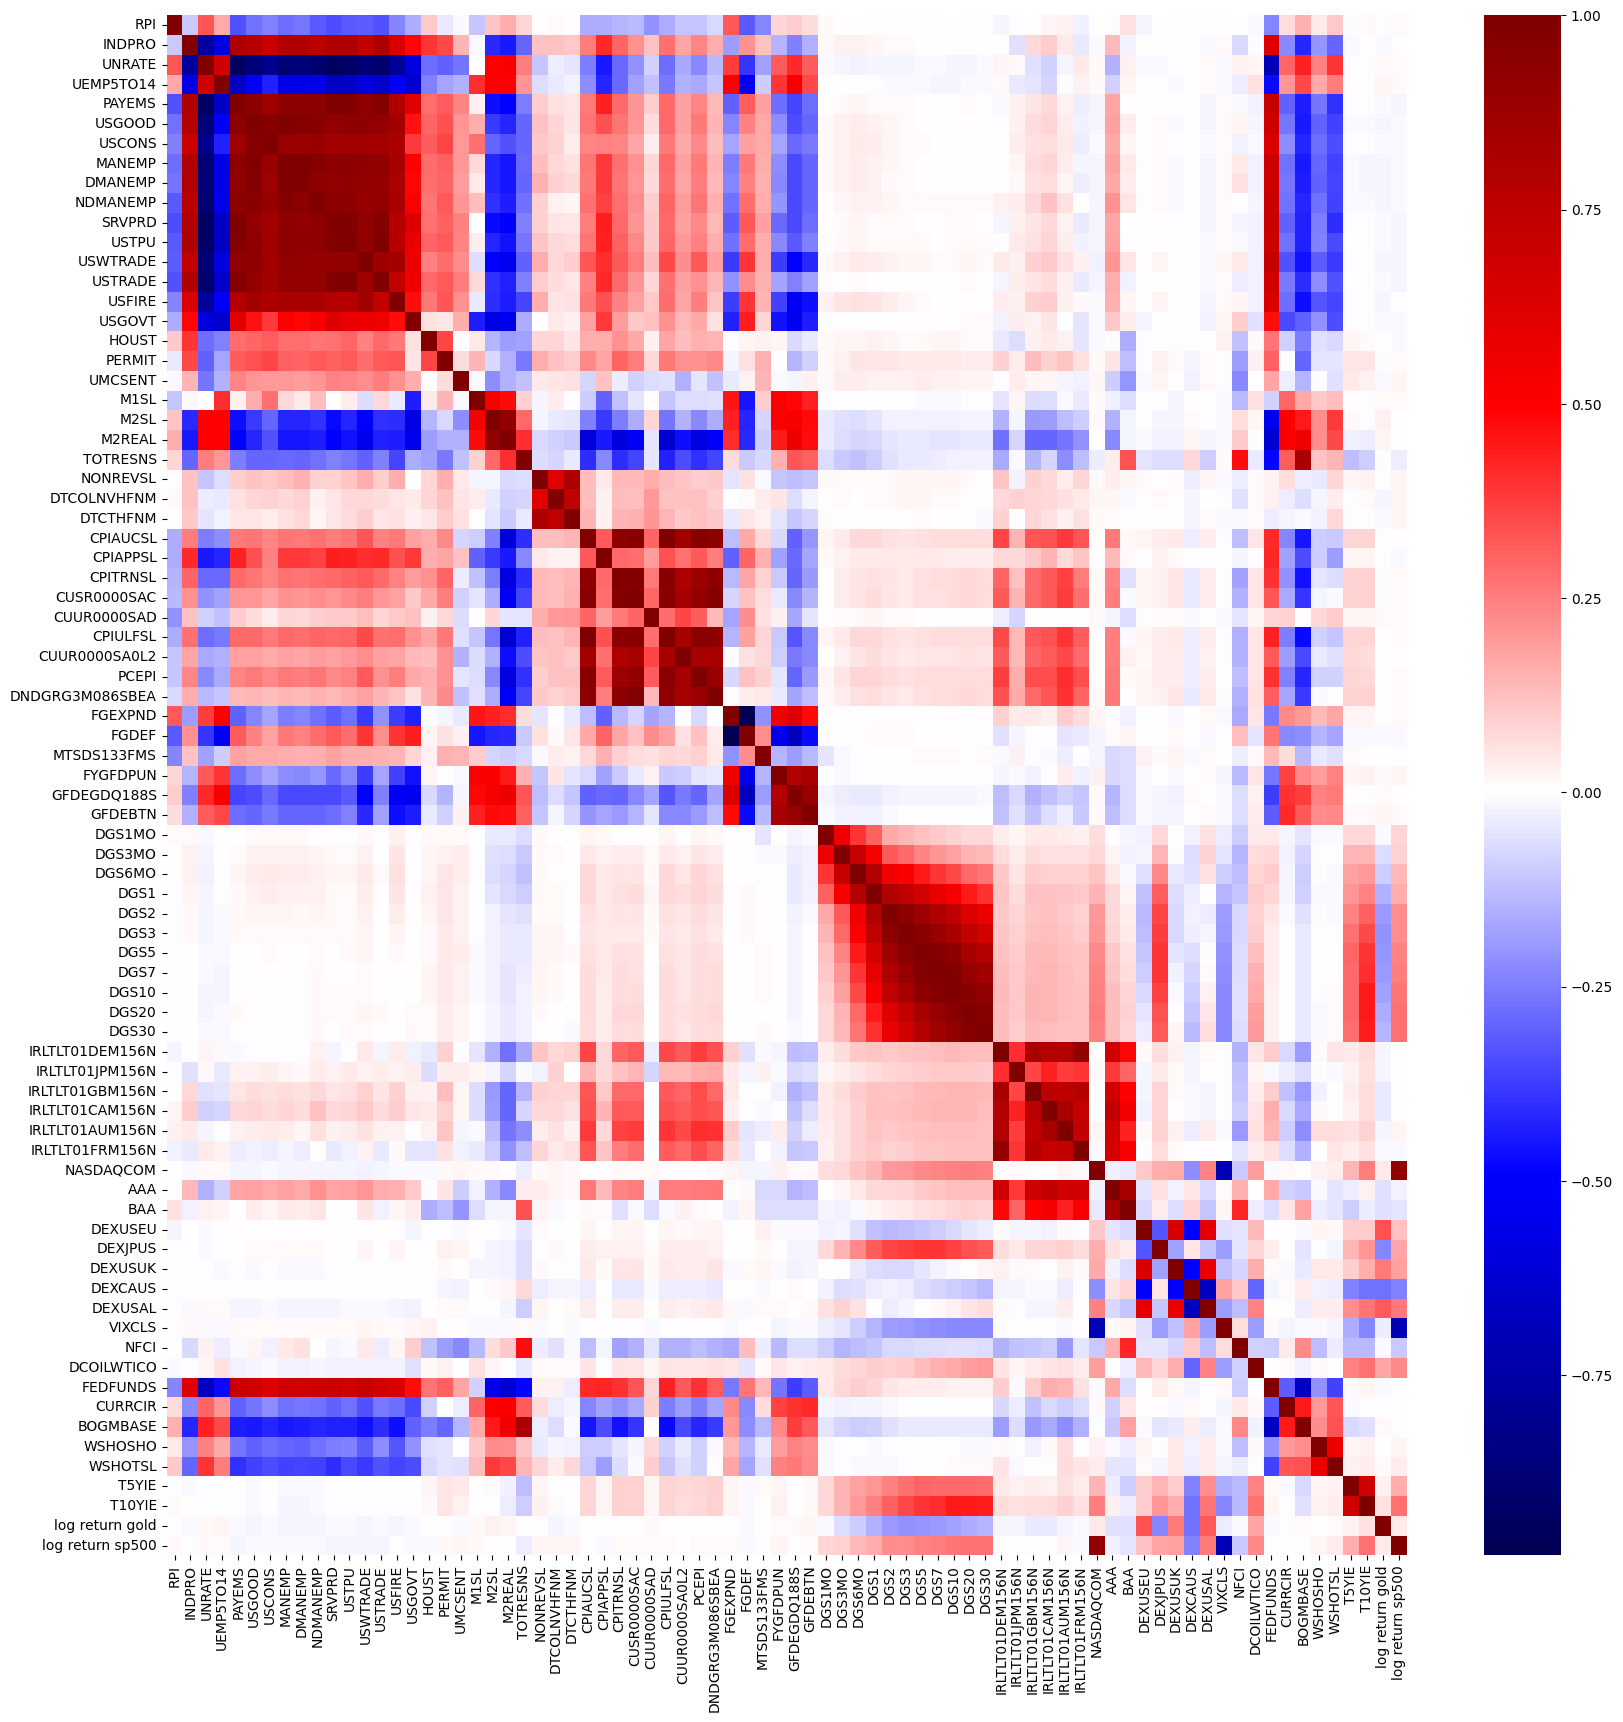

In [47]:
plt.figure(figsize = (20,20))
sns.heatmap(dus.corr(), cmap='seismic', center=0)

A few preliminary remarks: Since we want our models to be interpretable, we'll remove very correlated variables without combining them through a PCA for now. We might later combine features but for now we'll only remove the most redundant ones. 
- INDPRO, RPI, UEMP5TO14 have no correlation with yields, we will remove them. 
- UNRATE is very correlated PAYEMS = NFP variable and USGOOD,..., USGOVT which is the breakdown of NFP per economic sector. These are very redundant and not correlated at all with the yields so we will only keep UNRATE. 
- we will remove HOUST as it is correlated to PERMIT but not to the yields. 
- M2SL and M2REAL are very correlated, we'll remove M2REAL
- 'NONREVSL', 'DTCOLNVHFNM', 'DTCTHFNM' are variables related to liabilities of companies and households are not correlated at all to yields. We'll remove them.
- among inflation features, we may keep only CPIAUCSL, and not the breakdown per sector 'CPITRNSL','CPIMEDSL', 'CUSR0000SAC', 'CUUR0000SAD', 'CUSR0000SAS', 'CPIULFSL', 'CUUR0000SA0L2', 'CUSR0000SA0L5'. 
- FGDEF and FGEXPND = quarterly federal saving and expenditures are very anticorrelated. We'll remove the latter.
-  'FYGFDPUN', (federal debt held by the public, quarterly) ,'GFDEGDQ188S', (#debt to gdp ratio, quarterly), 'GFDEBTN', (total debt outstanding, monthly) are also very correlated so we will keep only 'GFDEGDQ188S'.
- yields of other developped countries 'IRLTLT01DEM156N', 'IRLTLT01JPM156N', 'IRLTLT01GBM156N','IRLTLT01CAM156N','IRLTLT01AUM156N', 'IRLTLT01FRM156N', are also very correlated and are correlated in the same way to US yields. For now we will keep only Japan and Germany yield.
- NASDAQ and SP500 log returns are very correlated ans are correlated in the same way to US yields. We'll remove NASDAQ. 
-DEXCAUS is very anticorrelated to USD/CAD and USD/GBP exchange rates without prodiving any additional information on yields so we will remove it. 
- finally we'll also remove T5YIE, WSHOSHO and BOGMBASE as they are correlated and redundant with other variables. 






In [88]:
variables_to_remove = ['RPI',
                       'INDPRO',
                       'HOUST',
                       'PAYEMS',
                    'UEMP5TO14',
                    'USGOOD',   
                    'USCONS',
                    'MANEMP',
                    'DMANEMP',
                    'NDMANEMP',
                    'SRVPRD',
                    'USTPU',
                    'USWTRADE',
                    'USTRADE',
                    'USFIRE',
                    'USGOVT',
                    'M1SL',
                    'M2REAL',
                    'NONREVSL',
                    'DTCOLNVHFNM', 
                    'DTCTHFNM',
                    'CPITRNSL',
                    'CUUR0000SAD', 
                    'CUSR0000SAC',
                    'CPIAPPSL',
                    'CPIULFSL', 
                    'CUUR0000SA0L2', 
                    'PCEPI',
                    'DNDGRG3M086SBEA',
                    'MTSDS133FMS',
                    'GFDEBTN',
                    'FYGFDPUN',
                    'FGDEF',
                    'FGEXPND',
                    'IRLTLT01GBM156N',
                    'IRLTLT01CAM156N',
                    'IRLTLT01AUM156N', 
                    'IRLTLT01FRM156N',
                    'NASDAQCOM',
                    'DEXCAUS',
                    'T5YIE', 
                    'WSHOSHO',
                    'BOGMBASE',
                    'WSHOTSL',
                    'CURRCIR'
                    ]

We can remove these columns and see what our heatmap looks like now. 

In [91]:
dus.columns

Index(['UNRATE', 'PERMIT', 'UMCSENT', 'M2SL', 'TOTRESNS', 'CPIAUCSL',
       'GFDEGDQ188S', 'DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3',
       'DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30', 'IRLTLT01DEM156N',
       'IRLTLT01JPM156N', 'AAA', 'BAA', 'DEXUSEU', 'DEXJPUS', 'DEXUSUK',
       'DEXUSAL', 'VIXCLS', 'NFCI', 'DCOILWTICO', 'FEDFUNDS', 'T10YIE',
       'log return gold', 'log return sp500'],
      dtype='object')

<Axes: >

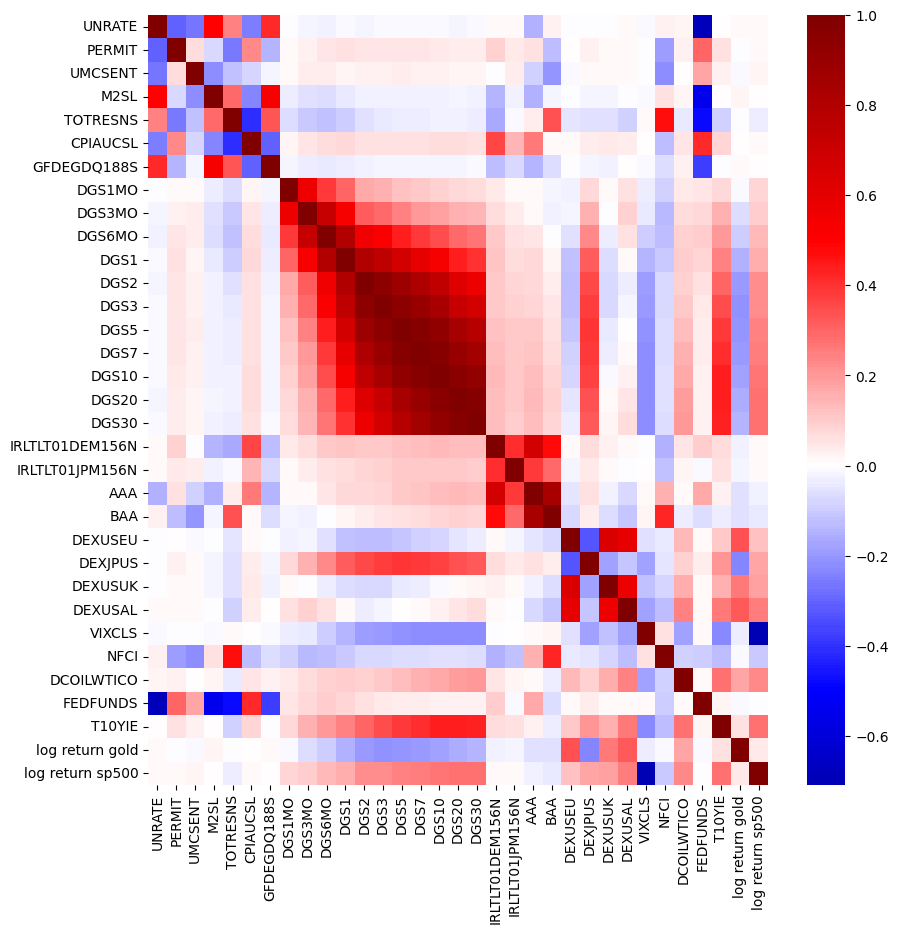

In [90]:
dus = dus.drop(columns=variables_to_remove)
plt.figure(figsize = (10,10))
sns.heatmap(dus.corr(), cmap='seismic', center=0)

Now we need to add the lagged values of yields as features. We have to choose lags and yields to add as features. 

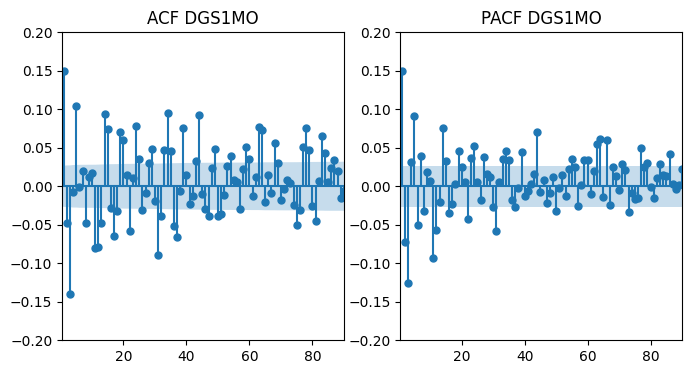

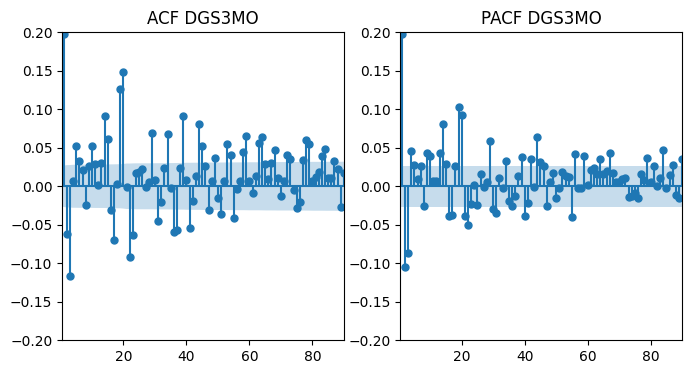

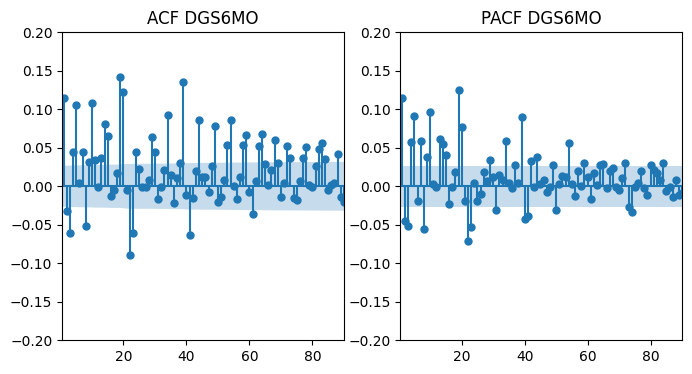

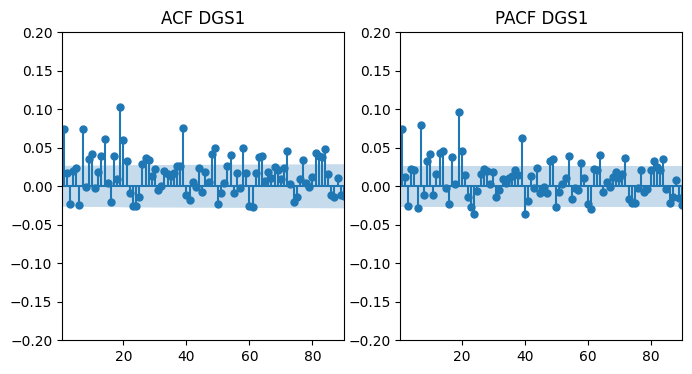

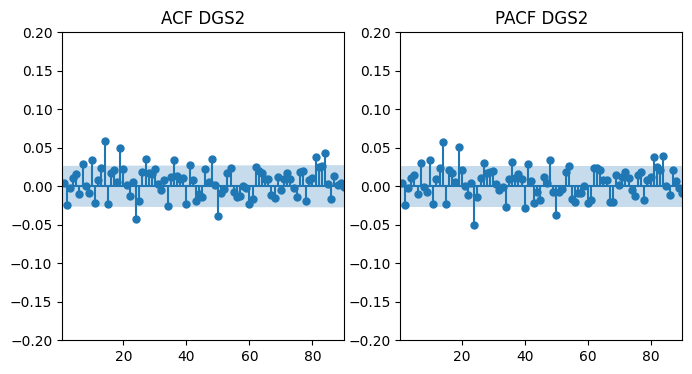

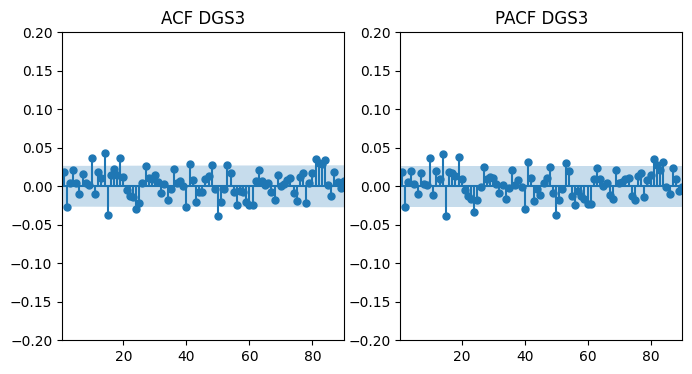

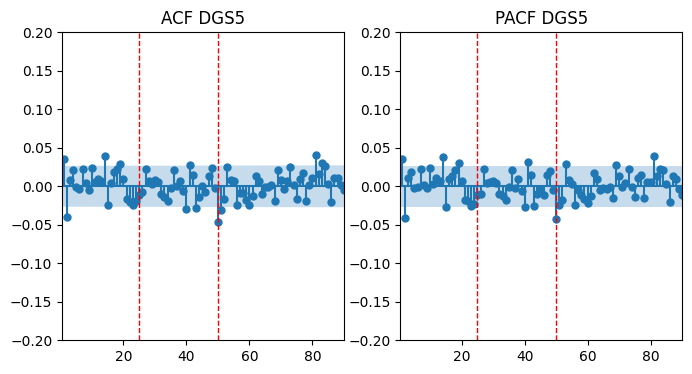

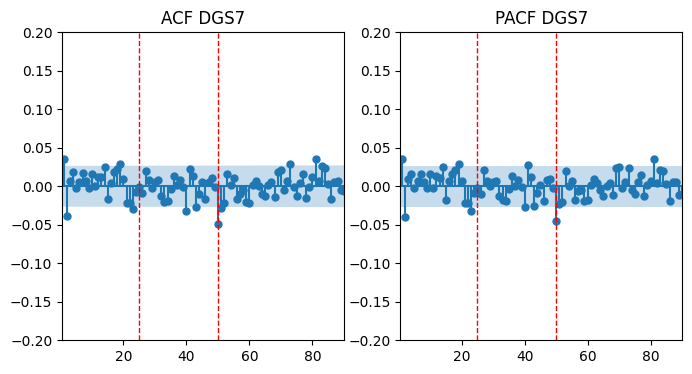

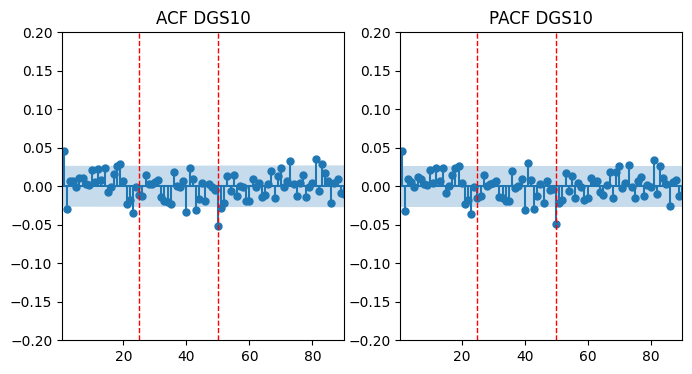

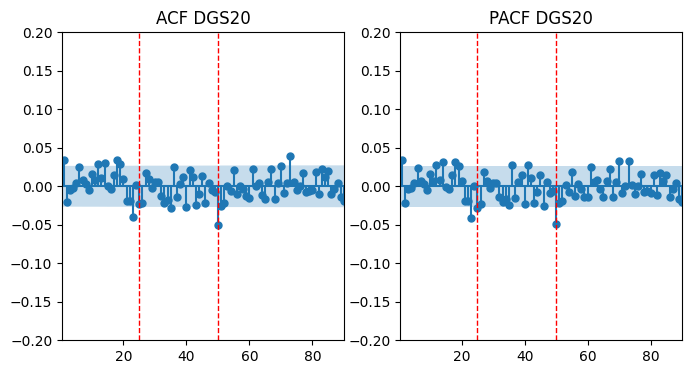

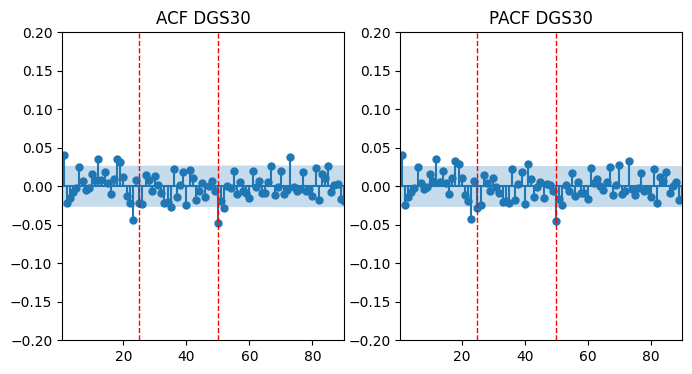

In [114]:

for USyield in ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3','DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']:
    series = dus[USyield]
    fig, axes = plt.subplots(1,2, figsize=(8,4))
    plot_acf(series, lags=90,title = f'ACF {USyield}', ax = axes[0])
    plot_pacf(series, lags=90,title = f'PACF {USyield}',ax = axes[1])

    for ax in axes:
        ax.set_xlim(0.5, 90)  # décale le début après 0
        ax.set_ylim(-0.2, 0.2) 

        if USyield in ['DGS5','DGS7','DGS10', 'DGS20', 'DGS30']:
            
            ax.axvline(x=25, color='red', linestyle='--', linewidth=1)
            ax.axvline(x=50, color='red', linestyle='--', linewidth=1)

    
    plt.show()


- We can see that on short term yields, there is much more autocorrelation in the data, up to more than 30 days. Returns in the past few days are highly correlated to returns in the next days. 
- However, on long term yields, there is much less autocorrelation and returns in the past 2 days are only slightly correlated to next day return. Surprisingly we see some persistent autocorrelation between returns at day t and t-25 and t-50. 

For maturities less than 1y, we'll add the following lags:
- t-1,t-2,t-3,t-5,t-10,t-15,t-20,t-25,t-30,t-40,t-50

For maturities more than 1y, we will add:
- t-1,t-2,t-10,t-25,t-50

We will probably need to do some PCA to combine features as they will be very correlated.


### TO DO:
- reflechir à quels lags et quels yields rajouter comme feature pour les yields 
- refaire les heatmaps avec les lags 
- comprendre pk le VAR fonctionne alors que les features du var sont corrélés 
- regarder les ACF et PACF 

Ideas of features combinations that can be done later: 
- we can combine yields of developped countries in a same feature 'IRLTLT01DEM156N', 'IRLTLT01JPM156N', 'IRLTLT01GBM156N','IRLTLT01CAM156N','IRLTLT01AUM156N', 'IRLTLT01FRM156N'. 
- AAA and BAA yields are very correlated but they are not correlated the same way to US yields.
- the macro features 'UNRATE', 'PERMIT', 'UMCSENT', 'M2SL', 'TOTRESNS', 'CPIAUCSL', 'GFDEGDQ188S' are overall very correlated with the 'FEDFUNDS' feature, maybe we could combine them later. 



In [ ]:
dus.describe()

RPI       INDPRO       UNRATE     UEMP5TO14     UEMP27OV  \
count   5538.000000  5538.000000  5538.000000   5538.000000  5538.000000   
mean   15728.405273    98.152828     5.815005   2503.807512  2589.488263   
std     2486.144034     4.617676     2.037773   1130.174543  1662.620066   
min    11991.075000    84.674600     3.400000   1525.000000   910.000000   
25%    13779.884000    95.515775     4.200000   1990.000000  1338.000000   
50%    14962.471000    99.049200     5.100000   2296.000000  1847.000000   
75%    17701.297000   101.942100     6.900000   2765.500000  3704.000000   
max    22918.422000   104.103800    14.800000  14806.000000  6800.000000   

              PAYEMS        USGOOD  CES1021000001       USCONS        MANEMP  \
count    5538.000000   5538.000000    5538.000000  5538.000000   5538.000000   
mean   140821.976706  20371.986457     646.737107  6902.323944  12770.166847   
std      8499.518721   1464.632172      97.588495   808.761954    903.768371   
min    129705.000000  17613.000000     491.100000  5427.000000  11382.000000   
25%    133519.000000  19240.000000     579.700000  6246.250000  12086.000000   
50%    138177.000000  20579.000000     635.900000  7037.500000  12576.000000   
75%    147660.000000  21671.000000     703.500000  7533.000000  13419.000000   
max    158942.000000  22627.000000     851.700000  8289.000000  14867.000000   

       ...         WSHOBL        T5YIE       T10YIE      XAU_USD       vwretd  \
count  ...    5538.000000  5538.000000  5538.000000  5538.000000  5538.000000   
mean   ...  130705.759661     1.931231     2.091369  1252.075417     0.000474   
std    ...  133818.167511     0.571097     0.401029   533.298157     0.011776   
min    ...       0.000000    -2.240000     0.040000   323.000000    -0.118168   
25%    ...       0.000000     1.620000     1.840000   877.250000    -0.004192   
50%    ...   18423.000000     1.970000     2.190000  1268.850000     0.000810   
75%    ...  267019.000000     2.320000     2.360000  1664.050000     0.005826   
max    ...  326044.000000     3.590000     3.020000  2786.190000     0.114918   

            vwretx       ewretd       ewretx       sprtrn       spindx  
count  5538.000000  5538.000000  5538.000000  5538.000000  5538.000000  
mean      0.000394     0.000547     0.000464     0.000414  2235.283178  
std       0.011774     0.011086     0.011086     0.011832  1274.110071  
min      -0.118218    -0.107631    -0.107768    -0.119841   676.530000  
25%      -0.004259    -0.004319    -0.004392    -0.004136  1241.507500  
50%       0.000733     0.001132     0.001045     0.000721  1805.450000  
75%       0.005743     0.005961     0.005906     0.005714  2888.142500  
max       0.114856     0.107422     0.107335     0.115800  6090.270000  

[8 rows x 101 columns]

In [ ]:
print(dus.shape)
n_rows = dus.shape[0]
test_size = 0.8
dus_train, dus_test = dus.iloc[:int(test_size * n_rows)], dus.iloc[int(test_size * n_rows):]

(5538, 101)


In [ ]:
dus_train.describe()

RPI       INDPRO       UNRATE     UEMP5TO14     UEMP27OV  \
count   4430.000000  4430.000000  4430.000000   4430.000000  4430.000000   
mean   14771.800435    97.342642     6.155734   2642.268623  2751.200903   
std     1741.761028     4.706170     2.060312   1217.034438  1747.539591   
min    11991.075000    84.674600     3.500000   1550.000000   910.000000   
25%    13547.935000    93.735300     4.700000   2163.000000  1372.000000   
50%    14386.123000    98.682600     5.500000   2377.000000  1929.000000   
75%    16090.905000   101.249300     7.700000   2859.000000  4042.000000   
max    19985.052000   104.103800    14.800000  14806.000000  6800.000000   

              PAYEMS        USGOOD  CES1021000001       USCONS        MANEMP  \
count    4430.000000   4430.000000    4430.000000  4430.000000   4430.000000   
mean   137988.711287  20204.195260     668.752709  6676.968172  12803.558465   
std      6540.032100   1562.797429      95.819169   732.869846    997.454375   
min    129705.000000  17613.000000     498.000000  5427.000000  11382.000000   
25%    132431.000000  18737.000000     610.100000  5932.000000  11978.000000   
50%    136762.000000  20029.000000     665.200000  6796.000000  12390.000000   
75%    142808.000000  21798.500000     728.500000  7347.000000  13922.000000   
max    152292.000000  22627.000000     851.700000  7726.000000  14867.000000   

       ...         WSHOBL        T5YIE       T10YIE      XAU_USD       vwretd  \
count  ...    4430.000000  4430.000000  4430.000000  4430.000000  4430.000000   
mean   ...   93030.617607     1.818926     2.038716  1071.046088     0.000453   
std    ...  120880.543749     0.553967     0.414672   417.703957     0.012084   
min    ...       0.000000    -2.240000     0.040000   323.000000    -0.118168   
25%    ...       0.000000     1.560000     1.790000   668.562500    -0.004081   
50%    ...   18423.000000     1.845000     2.120000  1202.495000     0.000840   
75%    ...  245266.000000     2.180000     2.340000  1331.352500     0.005654   
max    ...  326044.000000     2.940000     2.760000  2040.400000     0.114918   

            vwretx       ewretd       ewretx       sprtrn       spindx  
count  4430.000000  4430.000000  4430.000000  4430.000000  4430.000000  
mean      0.000369     0.000591     0.000508     0.000376  1687.373361  
std       0.012083     0.011239     0.011239     0.012156   649.589543  
min      -0.118218    -0.107631    -0.107768    -0.119841   676.530000  
25%      -0.004184    -0.004037    -0.004083    -0.004006  1188.335000  
50%       0.000767     0.001237     0.001165     0.000708  1416.065000  
75%       0.005565     0.005751     0.005642     0.005514  2099.297500  
max       0.114856     0.107422     0.107335     0.115800  3386.150000  

[8 rows x 101 columns]

In [ ]:
rho = dus_train.corr()


In [ ]:
high_correlations = rho[abs(rho) >= 0.7]
low_correlations = rho[abs(rho) <= 0.1]

In [ ]:
(-high_correlations.isna()).sum().sum() - high_correlations.shape[0]

np.int64(3030)

In [ ]:
high_correlations.size

10201

In [ ]:
&